In [9]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
#URL West Texas Intermediate Crude Oil Price, Annual
url_price = "http://api.eia.gov/series/?api_key=4a60fcfe3a762ea4e4d9276f8944aa76&series_id=STEO.WTIPUUS.A"
url_price_coal = "http://api.eia.gov/series/?api_key=4a60fcfe3a762ea4e4d9276f8944aa76&series_id=STEO.CLEUDUS.A"
url_price_naturalgas = "http://api.eia.gov/series/?api_key=4a60fcfe3a762ea4e4d9276f8944aa76&series_id=STEO.NGHHUUS.A"
Price_CSV = "resources/energy_price.csv"
Price_graph = "output/"
CPI_CSV = "CPI_index/CPI_multiplier.csv"
CPI_data = pd.read_csv(CPI_CSV)

In [11]:
price = requests.get(url_price).json()
pricecoal = requests.get(url_price_coal).json()
pricenaturalgas = requests.get(url_price_naturalgas).json()
headers = {'Content-type': 'application/json'}
#CPI Json
#data = json.dumps({"seriesid": ['CUUR0000SA0','SUUR0000SA0'],"startyear":"1990", "endyear":"2019"})
#p = requests.post('https://api.bls.gov/publicAPI/v1/timeseries/data/', data=data, headers=headers)
#inflation_data = json.loads(p.text)
#print(json.dumps(inflation_data, indent=4, sort_keys=True))

#print(json.dumps(inflation_data["Results"], indent = 4, sort_keys=True))

In [12]:
year = []
price_value = []
price_COAL = []
year_COAL = []
price_NATURALGAS = []
year_NATURALGAS = []
pct_oils = []
for x in price['series'][0]['data']:
    year.append(x[0])
    price_value.append(x[1])   
for x in pricecoal['series'][0]['data']:
    year_COAL.append(x[0])
    price_COAL.append(x[1])
for x in pricenaturalgas['series'][0]['data']:
    year_NATURALGAS.append(x[0])
    price_NATURALGAS.append(x[1])


In [13]:
Oil_data = pd.DataFrame({"year":year, "Price of Oil":price_value}, index= year)
# may delete this total energy column later on
#TETCD_data = pd.DataFrame({"year":year_TETCD, "Average price of Total Energy":price_TETCD}, index= year)
Coal_data = pd.DataFrame({"year":year_COAL, "Price of Coal":price_COAL}, index= year_COAL)
naturalgas_data = pd.DataFrame({"year":year_NATURALGAS, "Price of Natural Gas":price_NATURALGAS}, index= year_NATURALGAS)
Price_data_init = naturalgas_data.merge(Coal_data,left_on='year', right_on='year')
Price_data_final = Price_data_init.merge(Oil_data,left_on='year', right_on='year')
#Price_data_CSV = Price_data_final.to_csv(Price_CSV, encoding='utf-8', index=False)
Price_data_final = Price_data_final.reindex(index=Price_data_final.index[::-1])
Price_data_final_visual = Price_data_final.set_index("year")
gas = Price_data_final_visual.groupby(["Price of Oil"]).sum()
Price_data_final_visual

,Price of Natural Gas,Price of Coal,Price of Oil
year,,,
1990,1.698333,1.454065,24.500317
1991,1.486667,1.446003,21.527956
1992,1.771667,1.411528,20.583705
1993,2.120833,1.384865,18.410472
1994,1.920000,1.355419,17.208427
1995,1.686667,1.317057,18.427258
1996,2.756667,1.288237,22.132134
1997,2.497417,1.272109,20.588635
1998,2.090917,1.251777,14.415439


In [17]:
Price_data_final_visual.pct_change()


,Price of Natural Gas,Price of Coal,Price of Oil
year,,,
1990,NaN,NaN,NaN
1991,-0.124632,-0.005544,-0.121319
1992,0.191704,-0.023842,-0.043862
1993,0.197084,-0.018889,-0.105580
1994,-0.094695,-0.021263,-0.065291
1995,-0.121528,-0.028303,0.070828
1996,0.634387,-0.021882,0.201054
1997,-0.094045,-0.012519,-0.069740
1998,-0.162768,-0.015983,-0.299835


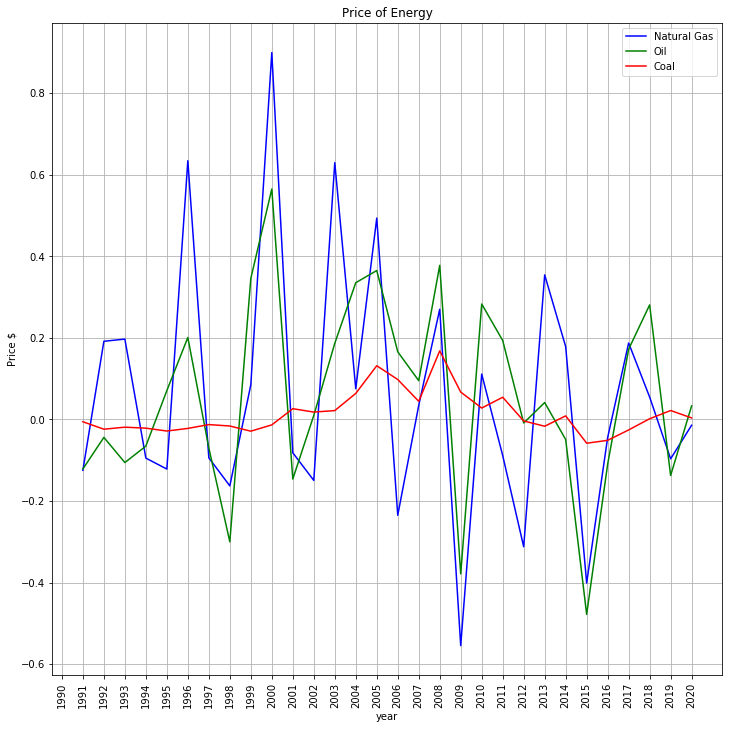

In [19]:
Percent_change = Price_data_final_visual.pct_change()
width = 12
height = 12
plt.figure(figsize=(width, height))
gas, = plt.plot(Percent_change.index,Percent_change['Price of Natural Gas'] , color="blue", label='Natural Gas')
oil, = plt.plot(Percent_change.index,Percent_change['Price of Oil'] , color="green", label="Oil" )
coal, = plt.plot(Percent_change.index,Percent_change['Price of Coal'] , color="red", label="Coal" )
plt.xticks(rotation=90)
plt.title("Price of Energy")
plt.grid(True)
plt.xlabel("year")
plt.ylabel("Price $")
plt.legend()
overgraph = Price_graph + "Price of Energy % change.png"
plt.savefig(overgraph)
    

    

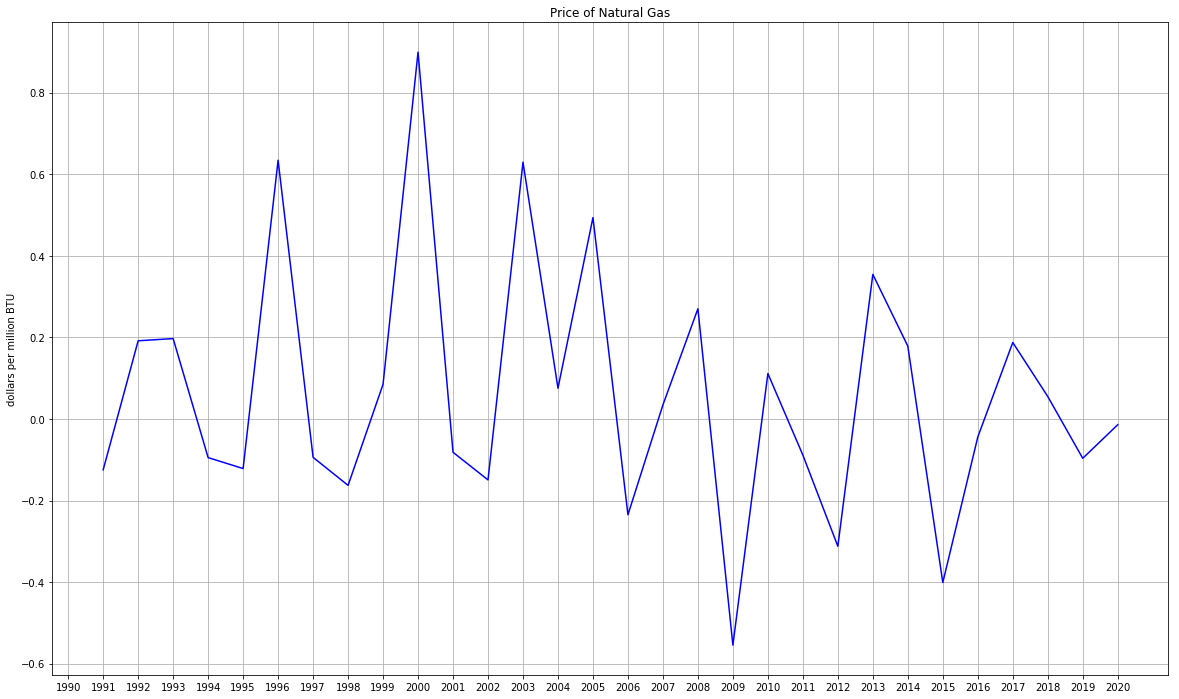

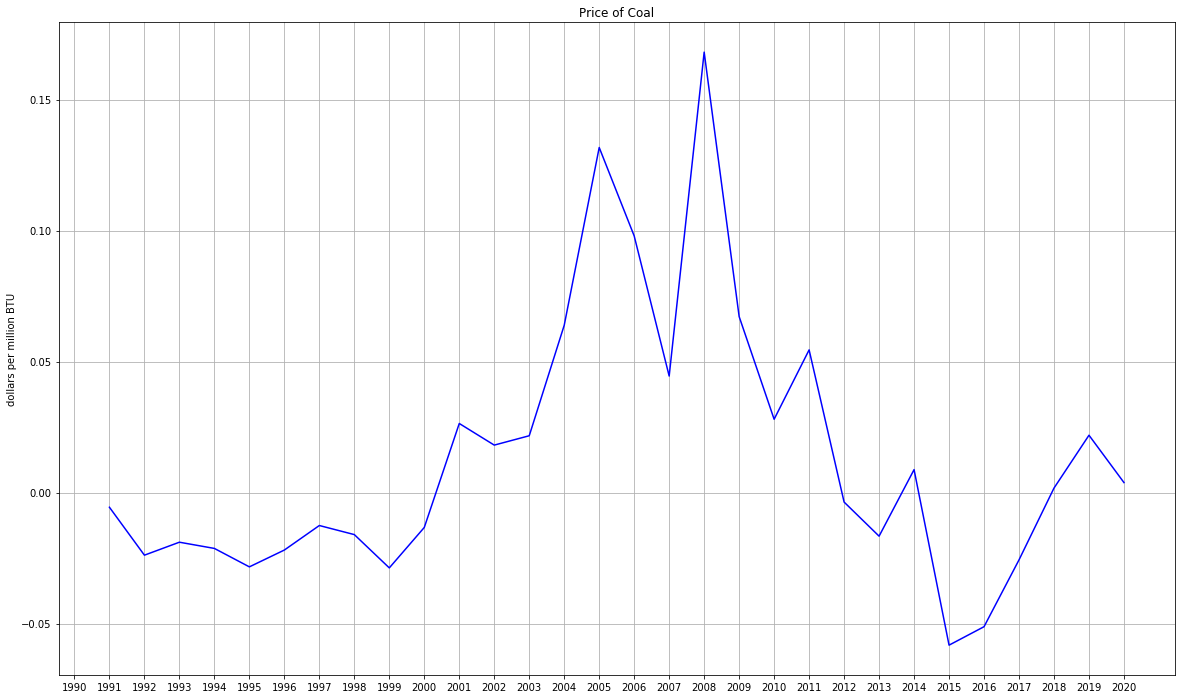

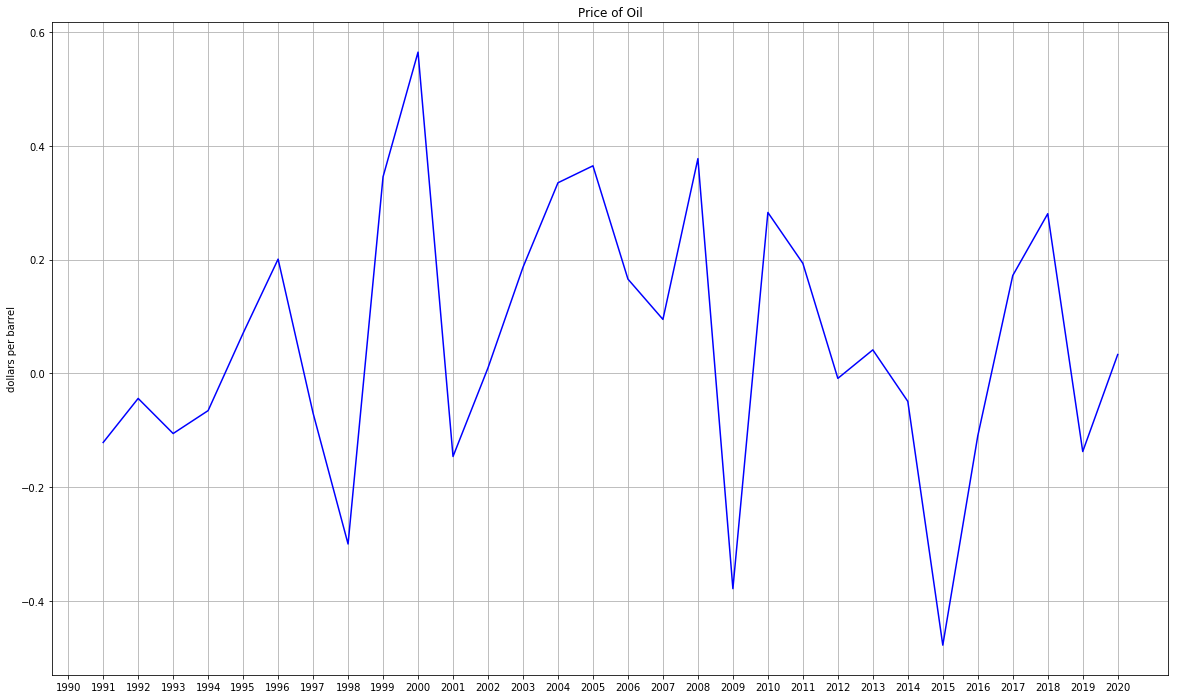

In [22]:
for column in Percent_change.columns[0:]:
    width = 20
    height = 12
    if column == "Price of Oil":
        x = "dollars per barrel"
    else: 
        x ="dollars per million BTU"
    plt.figure(figsize=(width, height))
    plt.plot(Percent_change.index, Percent_change[column] , color="blue", label=column)
    plt.grid(True)
    plt.title(column)
    plt.ylabel(x)
    y =Price_graph + column + " graph.png"
    plt.savefig(y)

In [24]:
# Adjusting for inflation
CPI_data['year']=CPI_data['year'].astype(int)
Price_data_final['year']=Price_data_final['year'].astype(int)
AFI = CPI_data.merge(Price_data_final,left_on='year', right_on='year')
AFI
Oil_adjusted = AFI["CPI_multiplier"]*AFI["Price of Oil"]
Coal_adjusted = AFI["CPI_multiplier"]*AFI["Price of Coal"]
Gas_adjusted = AFI["CPI_multiplier"]*AFI["Price of Natural Gas"]
AFI["Oil Adjusted for inflation"]=Oil_adjusted
AFI["Coal Adjusted for inflation"]=Coal_adjusted
AFI["Gas Adjusted for inflation"]=Gas_adjusted
AFI

,year,CPI_multiplier,Price of Natural Gas,Price of Coal,Price of Oil,Oil Adjusted for inflation,Coal Adjusted for inflation,Gas Adjusted for inflation
0,1990,1.000000,1.698333,1.454065,24.500317,24.500317,1.454065,1.698333
1,1991,0.946548,1.486667,1.446003,21.527956,20.377242,1.368711,1.407201
2,1992,0.921909,1.771667,1.411528,20.583705,18.976300,1.301300,1.633315
3,1993,0.892857,2.120833,1.384865,18.410472,16.437922,1.236487,1.893601
4,1994,0.871497,1.920000,1.355419,17.208427,14.997091,1.181244,1.673274
5,1995,0.847176,1.686667,1.317057,18.427258,15.611132,1.115779,1.428904
6,1996,0.824176,2.756667,1.288237,22.132134,18.240770,1.061734,2.271978
7,1997,0.799875,2.497417,1.272109,20.588635,16.468325,1.017528,1.997620
8,1998,0.787037,2.090917,1.251777,14.415439,11.345484,0.985195,1.645629
9,1999,0.774135,2.268667,1.215860,19.401181,15.019129,0.941239,1.756254


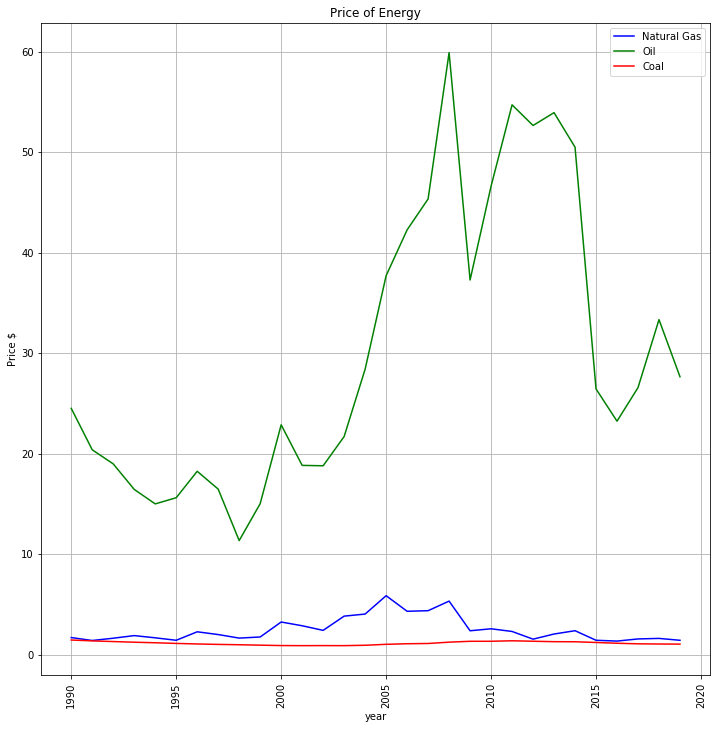

In [13]:
width = 12
height = 12
plt.figure(figsize=(width, height))
gas, = plt.plot(AFI['year'],AFI['Gas Adjusted for inflation'] , color="blue", label='Natural Gas adj')
oil, = plt.plot(AFI['year'],AFI['Oil Adjusted for inflation'] , color="green", label="Oil adj" )
coal, = plt.plot(AFI['year'],AFI['Coal Adjusted for inflation'] , color="red", label="Coal adj" )
plt.xticks(rotation=90)
plt.title("Price of Energy (adjusted for inflation)")
plt.grid(True)
plt.xlabel("year")
plt.ylabel("Price $")
plt.legend()
overgraph = Price_graph + "Price of Energy Adjusted for inflation.png"
plt.savefig(overgraph)


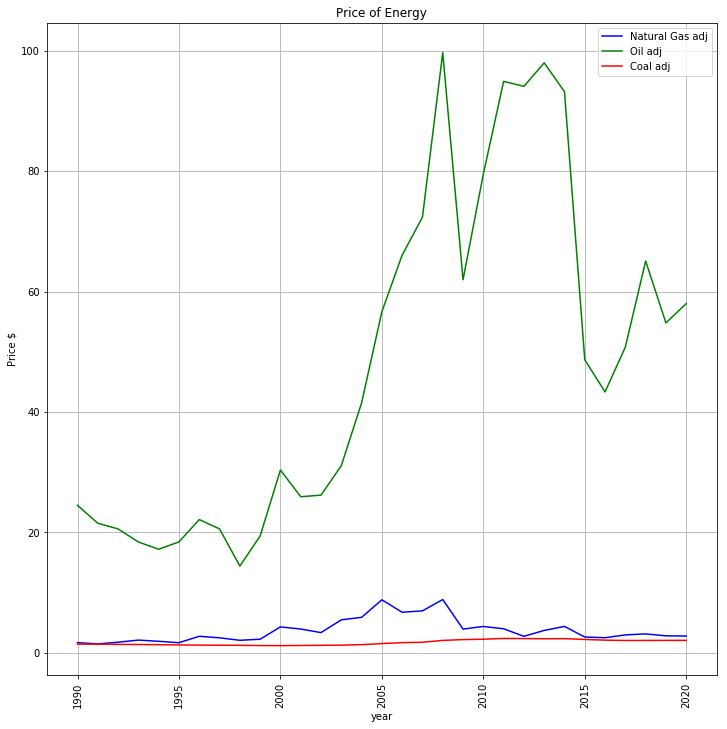

In [14]:
width = 12
height = 12
plt.figure(figsize=(width, height))
gas, = plt.plot(Price_data_final['year'],Price_data_final['Price of Natural Gas'] , color="blue", label='Natural Gas')
oil, = plt.plot(Price_data_final['year'],Price_data_final['Price of Oil'] , color="green", label="Oil" )
coal, = plt.plot(Price_data_final['year'],Price_data_final['Price of Coal'] , color="red", label="Coal" )
plt.xticks(rotation=90)
plt.title("Price of Energy")
plt.grid(True)
plt.xlabel("year")
plt.ylabel("Price $")
plt.legend()
overgraph = Price_graph + "Price of Energy.png"
plt.savefig(overgraph)

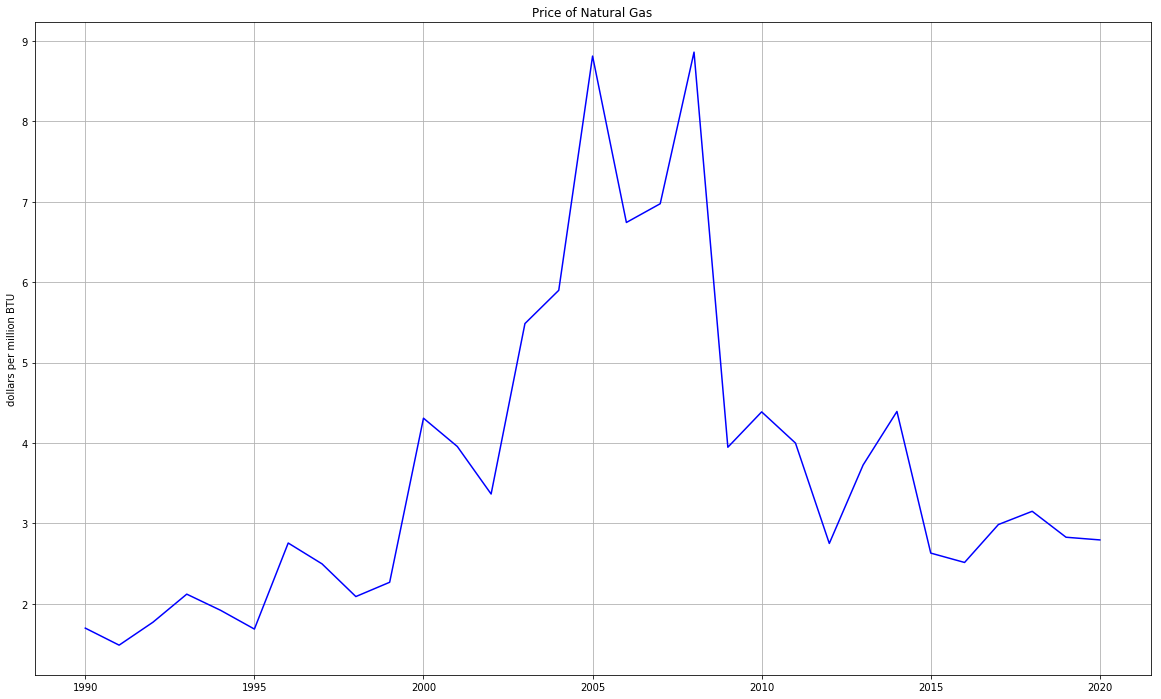

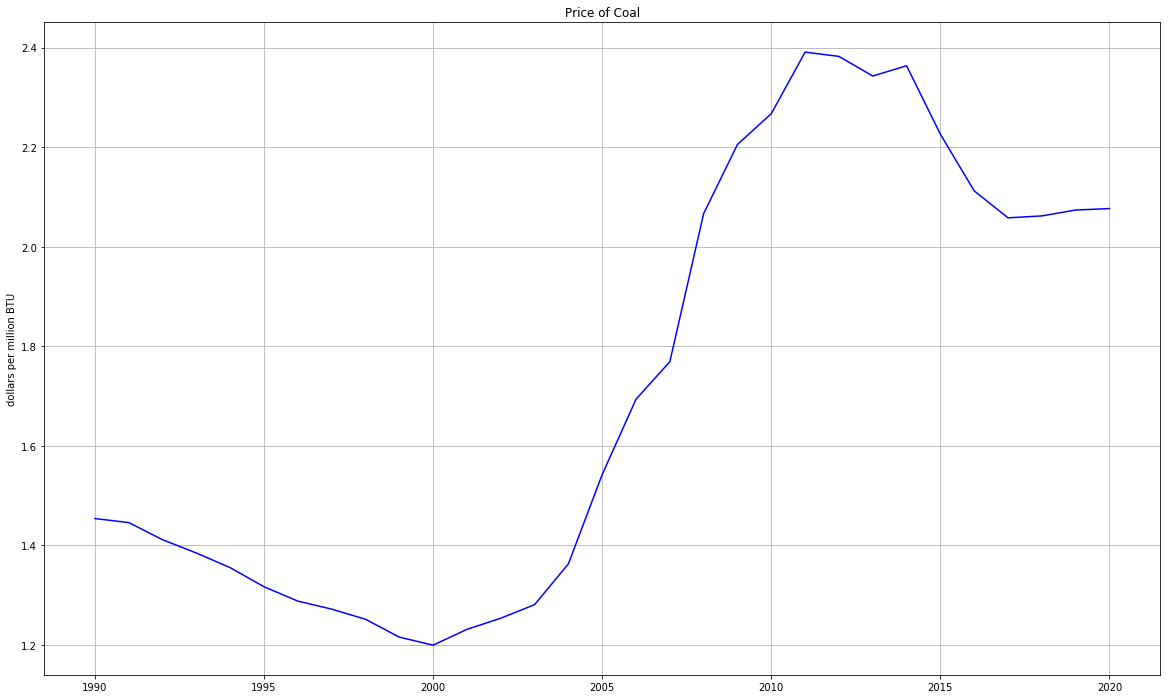

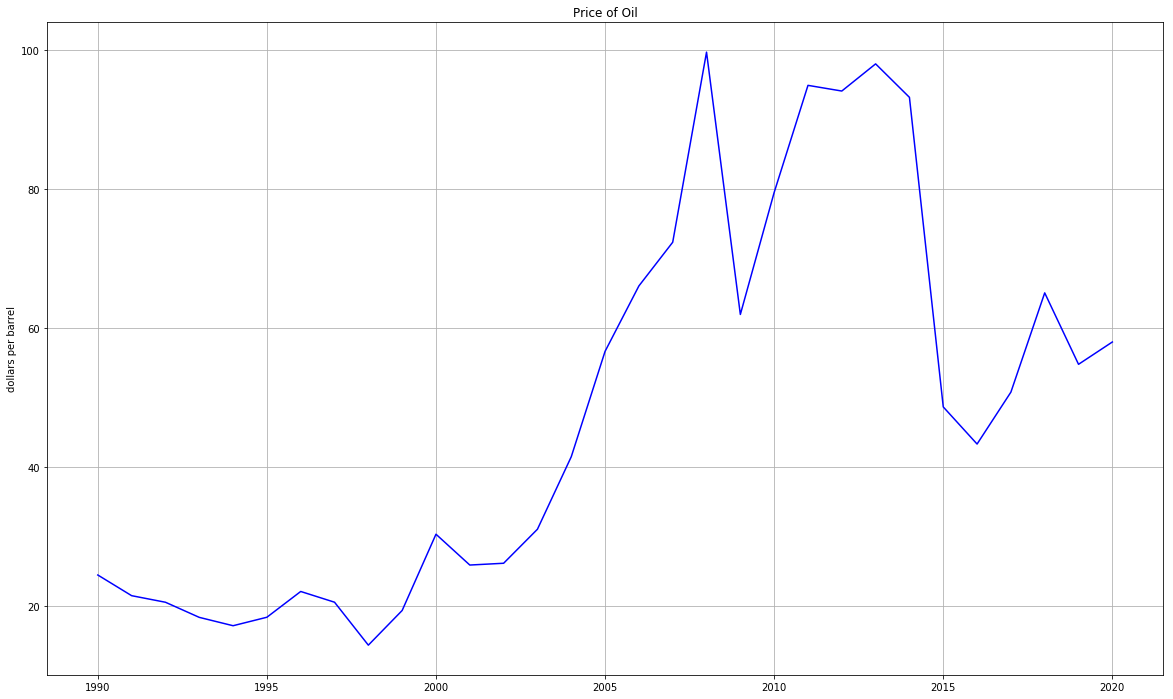

In [15]:
for column in Price_data_final_visual.columns[0:]:
    width = 20
    height = 12
    if column == "Price of Oil":
        x = "dollars per barrel"
    else: 
        x ="dollars per million BTU"
    plt.figure(figsize=(width, height))
    plt.plot(Price_data_final['year'], Price_data_final[column] , color="blue", label=column)
    plt.grid(True)
    plt.title(column)
    plt.ylabel(x)
    y =Price_graph + column + " graph.png"
    plt.savefig(y)

In [16]:
Price_CSV = Price_data_final_visual.to_csv(Price_CSV, encoding='utf-8', index=True)